Script containing a Recurrent Neural Network to predict Total claims, claims approved and PAs approved per day
By Apostolos Zournas

In [ ]:
#Import libraries for data preprocessing and plotting
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Data
claims = pd.read_csv('data/dim_claims.csv')
print(claims.head)
print(claims['reject_code'].value_counts())
pa = pd.read_csv('data/dim_pa.csv')
pa.head

<bound method NDFrame.head of          dim_claim_id     bin drug  reject_code  pharmacy_claim_approved
0                   1  417380    A         75.0                        0
1                   2  999001    A          NaN                        1
2                   3  417740    A         76.0                        0
3                   4  999001    A          NaN                        1
4                   5  417740    A          NaN                        1
...               ...     ...  ...          ...                      ...
1335571       1335572  417740    C         75.0                        0
1335572       1335573  999001    C          NaN                        1
1335573       1335574  417380    C         70.0                        0
1335574       1335575  999001    C          NaN                        1
1335575       1335576  999001    C          NaN                        1

[1335576 rows x 5 columns]>
70.0    252206
75.0    217351
76.0     86394
Name: reject_code, d

<bound method NDFrame.head of         dim_pa_id  correct_diagnosis  tried_and_failed  contraindication  \
0               1                  1                 1                 0   
1               2                  1                 0                 0   
2               3                  0                 0                 1   
3               4                  1                 1                 0   
4               5                  0                 1                 0   
...           ...                ...               ...               ...   
555946     555947                  1                 0                 1   
555947     555948                  1                 0                 1   
555948     555949                  1                 1                 1   
555949     555950                  1                 0                 0   
555950     555951                  0                 0                 1   

        pa_approved  
0                 1  
1            

In [3]:
bridge = pd.read_csv('data/bridge.csv')
bridge.head

<bound method NDFrame.head of          dim_claim_id  dim_pa_id  dim_date_id
0                   1        1.0            1
1                   2        NaN            1
2                   3        2.0            1
3                   4        NaN            1
4                   5        NaN            1
...               ...        ...          ...
1335571       1335572   555950.0         1095
1335572       1335573        NaN         1095
1335573       1335574   555951.0         1095
1335574       1335575        NaN         1095
1335575       1335576        NaN         1095

[1335576 rows x 3 columns]>

In [4]:
dates = pd.read_csv('data/dim_date.csv')
bridge.head

<bound method NDFrame.head of          dim_claim_id  dim_pa_id  dim_date_id
0                   1        1.0            1
1                   2        NaN            1
2                   3        2.0            1
3                   4        NaN            1
4                   5        NaN            1
...               ...        ...          ...
1335571       1335572   555950.0         1095
1335572       1335573        NaN         1095
1335573       1335574   555951.0         1095
1335574       1335575        NaN         1095
1335575       1335576        NaN         1095

[1335576 rows x 3 columns]>

In [5]:
idx = np.where(bridge['dim_pa_id'].values == bridge['dim_pa_id'].values)
df = bridge.copy()

In [6]:
tried_and_failed = np.zeros((len(claims)))
tried_and_failed[:] = np.nan
tried_and_failed[idx[0]] = pa['tried_and_failed'].values
tried_and_failed = tried_and_failed.reshape(-1, 1)

In [7]:
correct_diagnosis = np.zeros((len(claims)))
correct_diagnosis[:] = np.nan
correct_diagnosis[idx[0]] = pa['correct_diagnosis'].values
correct_diagnosis = correct_diagnosis.reshape(-1, 1)

In [8]:
contraindication = np.zeros((len(claims)))
contraindication[:] = np.nan
contraindication[idx[0]] = pa['contraindication'].values
contraindication = contraindication.reshape(-1, 1)

In [9]:
pa_approved = np.zeros((len(claims)))
pa_approved[:] = np.nan
pa_approved[idx[0]] = pa['pa_approved'].values
pa_approved = pa_approved.reshape(-1, 1)

In [10]:
# combine the data
claims['tried_and_failed'] = tried_and_failed
claims['correct_diagnosis'] = correct_diagnosis
claims['contraindication'] = contraindication
claims['pa_approved'] = pa_approved
claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,tried_and_failed,correct_diagnosis,contraindication,pa_approved
0,1,417380,A,75.0,0,1.0,1.0,0.0,1.0
1,2,999001,A,NaN,1,NaN,NaN,NaN,NaN
2,3,417740,A,76.0,0,0.0,1.0,0.0,1.0
3,4,999001,A,NaN,1,NaN,NaN,NaN,NaN
4,5,417740,A,NaN,1,NaN,NaN,NaN,NaN


In [11]:
# switch categorical data to one-hot encoded variables
claims_1hot = pd.get_dummies(data=claims, columns=['reject_code', 'drug', 'bin'])
y_data_70 = claims_1hot['reject_code_70.0']
y_data_75 = claims_1hot['reject_code_75.0']
y_data_76 = claims_1hot['reject_code_76.0']
claims_1hot_no_nans = claims_1hot.replace(np.nan, 0)
claims_1hot.head()

,dim_claim_id,pharmacy_claim_approved,tried_and_failed,correct_diagnosis,contraindication,pa_approved,reject_code_70.0,reject_code_75.0,reject_code_76.0,drug_A,drug_B,drug_C,bin_417380,bin_417614,bin_417740,bin_999001
0,1,0,1.0,1.0,0.0,1.0,0,1,0,1,0,0,1,0,0,0
1,2,1,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,1
2,3,0,0.0,1.0,0.0,1.0,0,0,1,1,0,0,0,0,1,0
3,4,1,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,1
4,5,1,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,1,0


In [12]:
X_data = claims_1hot_no_nans[
    ['pharmacy_claim_approved', 'tried_and_failed', 'correct_diagnosis', 'contraindication', 'pa_approved', 'drug_A',
     'drug_B', 'drug_C']]
y_data_70 = claims_1hot_no_nans['reject_code_70.0']
y_data_75 = claims_1hot_no_nans['reject_code_75.0']
y_data_76 = claims_1hot_no_nans['reject_code_76.0']

In [13]:

claims[claims['pa_approved'] == 1]['reject_code'].value_counts()
# Isolate the parameres we want to study:

X_data_cols_pa = ['tried_and_failed', 'correct_diagnosis', 'contraindication', 'drug_A', 'drug_B', 'drug_C',
                  'bin_417380', 'bin_417614', 'bin_417740', 'bin_999001']
X_data_cols = ['drug_A', 'drug_B', 'drug_C', 'bin_417380', 'bin_417614', 'bin_417740', 'bin_999001']
X_data_pharm = claims_1hot_no_nans[X_data_cols].values
claims_1hot_no_nans.head()
y_data_pharm = claims_1hot_no_nans['pharmacy_claim_approved'].values
claims_1hot_no_nans['pharmacy_claim_rejected'] = 1-claims_1hot_no_nans['pharmacy_claim_approved']
claims_1hot_no_nans['pa_rejected'] = claims_1hot_no_nans['pharmacy_claim_rejected'] - claims_1hot_no_nans['pa_approved']

claims_1hot_no_nans_rejected = claims_1hot_no_nans[claims_1hot_no_nans['pharmacy_claim_approved'] == 0]
X_data_rejected = claims_1hot_no_nans_rejected[X_data_cols_pa]
y_data_70 = claims_1hot_no_nans_rejected['reject_code_70.0']
y_data_75 = claims_1hot_no_nans_rejected['reject_code_75.0']
y_data_76 = claims_1hot_no_nans_rejected['reject_code_76.0']
y_data_pa = claims_1hot_no_nans_rejected['pa_approved']

In [53]:
#get the aggregate data per day
claims_1hot_no_nans['dim_date_id'] = bridge['dim_date_id']

list_of_vars = ['pharmacy_claim_approved', 'tried_and_failed', 'correct_diagnosis',
               'contraindication', 'pa_approved', 'pharmacy_claim_rejected', 'pa_rejected',
                 'reject_code_70.0','reject_code_75.0', 'reject_code_76.0', 
                'drug_A', 'drug_B', 'drug_C',
               'bin_417380', 'bin_417614', 'bin_417740', 'bin_999001']

#create new df to hold data
df_agg = pd.DataFrame(index = range(1,max(dates['dim_date_id'])))

#Group object grouped by dim_date_id
group_dates = claims_1hot_no_nans.groupby(by = ['dim_date_id'])
#Iterate through features in list_of_vars, sum values and add to df_agg[feature]
for i in list_of_vars:
    df_agg[i] = group_dates[i].agg([np.sum])

#Join df_agg to dates from the right; drop extra days at end
dates_join = dates.join(df_agg, on='dim_date_id')
dates_join['total_claims'] = dates_join['pharmacy_claim_approved'] + dates_join['pharmacy_claim_rejected']
dates_join = dates_join.dropna(subset = ['pharmacy_claim_approved'])
dates_join['pharmacy_claim_rejected_frac'] = dates_join['pharmacy_claim_rejected'] / dates_join['total_claims']
dates_join['pa_rejected_frac'] = dates_join['pa_rejected'] / dates_join['pharmacy_claim_rejected']


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date, datetime


In [37]:
# set device to be GPU if available - print relevant information
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
print('Using device:', device)
print()

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    

Using device: cuda

NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [38]:
# check accuracy on training and test data
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    counter = 0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y

            scores = model.forward(x)
            predictions = np.zeros(scores.size())
            idcs = np.where(scores.cpu() > 0.5)
            predictions[idcs] = 1
            # print(scores)
            # print(predictions)
            # print(y)
            # print(np.where(predictions == y))
            incorrect = (np.abs(np.reshape(predictions, (-1, 1)) - np.reshape(y.numpy(), (-1, 1))).sum())
            # print(incorrect)
            num_correct += scores.size(0) - incorrect

            num_samples += scores.size(0)

            counter += 1

        print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct) / float(num_samples) * 100} %')

    model.train()
    return num_correct / num_samples

In [39]:




class RNNModel(nn.Module):
    # defines a recurrent neural network
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [40]:

class Optimization:
    #Optimization structure used for training
    def __init__(self, model, loss_fn, optimizer):
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []

    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        model_path = f'models/{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch.to(device), y_batch.to(device))
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                #train for each Batch
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )
                foo = 1

       # torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        # Compare predictions with 
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.cpu().detach().numpy())
                values.append(y_test.cpu().detach().numpy())

        return predictions, values

    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

In [41]:
#generate features for the RNN
def generate_time_lags(df, n_lags, col_shift):
    #generates 
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n[col_shift].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [42]:
#Isolate X/y data
def feature_label_split(df, col):
    y = df[col]
    X = df.drop([col], axis=1)
    return X, y


In [43]:

def generate_loaders(X, Y, test_ratio = 0.2):
    #input X and Y data
    #outputs data structures to load in training validation and testing of the RNN
    val_ratio = test_ratio / (1 - test_ratio)
    X_train = X.iloc[:-int(0.1*len(X))]
    y_train = Y.iloc[:-int(0.1*len(X))]
    X_test = X.drop(X_train.index)
    y_test = Y.drop(y_train.index)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    scaler = StandardScaler()
    X_train_arr = scaler.fit_transform(X_train.values)
    X_val_arr = scaler.transform(X_val.values)
    X_test_arr = scaler.transform(X_test.values)
    
    y_train_arr = scaler.fit_transform(y_train.values)
    y_val_arr = scaler.transform(y_val.values)
    y_test_arr = scaler.transform(y_test.values)
    
    batch_size = 64
    
    train_features = torch.Tensor(X_train_arr).to(device)
    train_targets = torch.Tensor(y_train_arr).to(device)
    val_features = torch.Tensor(X_val_arr).to(device)
    val_targets = torch.Tensor(y_val_arr).to(device)
    test_features = torch.Tensor(X_test_arr).to(device)
    test_targets = torch.Tensor(y_test_arr).to(device)
    
    train = TensorDataset(train_features, train_targets)
    val = TensorDataset(val_features, val_targets)
    test = TensorDataset(test_features, test_targets)
    
    train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
    val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
    test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
    test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

    
    return scaler, train_loader, val_loader, test_loader, test_loader_one, X_train, y_train

In [44]:
#Calculate mean squared error
def get_MSE(y_test, y_pred):
    y_test = np.array(y_test).reshape(-1,1)
    y_pred = np.array(y_pred).reshape(-1,1)
    mse = np.linalg.norm(y_test-y_pred)**2/y_test.size
    return mse


def get_avg_MSE(preds, vals):
    mse_sum = 0
    for i in range(len(vals)):
        mse_sum += get_MSE(preds[i][0], vals[i][0])
        
    avg_mse = mse_sum/len(preds)
    return avg_mse

In [45]:
#Identify the inputs and outputs sizes that we want to test for parameter CV
input_lengths = [ 30,40,50,60,70,80,90,100,120,140 ]
output_lengths = [7,14,21,28,35]

In [46]:
#generate the data
df_pharm_approved_dates = dates_join.loc[:,['dim_date_id', 'total_claims']]
df_generated_2 = generate_time_lags(df_pharm_approved_dates, lags_generated, 'total_claims')
x_vals = df_generated_2['dim_date_id']

df_generated_2 = df_generated_2.drop(['dim_date_id'], axis =1)


C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7846	 Validation loss: 0.9587
[2/80] Training loss: 0.4008	 Validation loss: 0.5774
[3/80] Training loss: 0.2157	 Validation loss: 0.3917
[4/80] Training loss: 0.1441	 Validation loss: 0.2960
[5/80] Training loss: 0.1109	 Validation loss: 0.2351
[6/80] Training loss: 0.0929	 Validation loss: 0.1992
[7/80] Training loss: 0.0854	 Validation loss: 0.1769
[8/80] Training loss: 0.0814	 Validation loss: 0.1622
[9/80] Training loss: 0.0791	 Validation loss: 0.1538
[10/80] Training loss: 0.0776	 Validation loss: 0.1494
[50/80] Training loss: 0.0658	 Validation loss: 0.1256


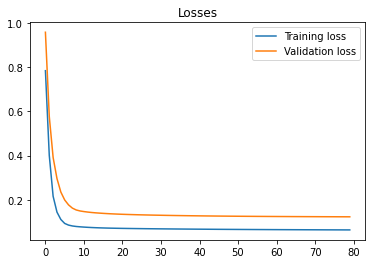

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.9401	 Validation loss: 1.2846
[2/80] Training loss: 0.5822	 Validation loss: 0.8805
[3/80] Training loss: 0.3464	 Validation loss: 0.6143
[4/80] Training loss: 0.2170	 Validation loss: 0.4669
[5/80] Training loss: 0.1608	 Validation loss: 0.3818
[6/80] Training loss: 0.1310	 Validation loss: 0.3230
[7/80] Training loss: 0.1124	 Validation loss: 0.2807
[8/80] Training loss: 0.1017	 Validation loss: 0.2469
[9/80] Training loss: 0.0948	 Validation loss: 0.2191
[10/80] Training loss: 0.0899	 Validation loss: 0.1982
[50/80] Training loss: 0.0698	 Validation loss: 0.1387


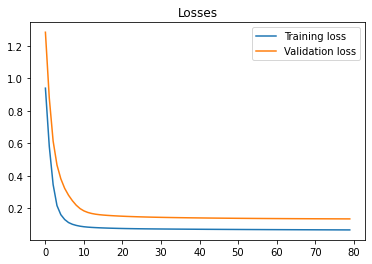

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8393	 Validation loss: 1.1686
[2/80] Training loss: 0.5194	 Validation loss: 0.8075
[3/80] Training loss: 0.3176	 Validation loss: 0.5957
[4/80] Training loss: 0.2238	 Validation loss: 0.4853
[5/80] Training loss: 0.1771	 Validation loss: 0.4087
[6/80] Training loss: 0.1433	 Validation loss: 0.3481
[7/80] Training loss: 0.1204	 Validation loss: 0.2991
[8/80] Training loss: 0.1062	 Validation loss: 0.2605
[9/80] Training loss: 0.0980	 Validation loss: 0.2318
[10/80] Training loss: 0.0930	 Validation loss: 0.2117
[50/80] Training loss: 0.0730	 Validation loss: 0.1482


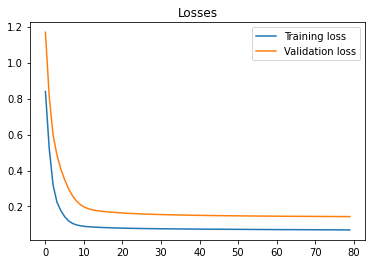

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8923	 Validation loss: 1.3428
[2/80] Training loss: 0.6174	 Validation loss: 1.0011
[3/80] Training loss: 0.4045	 Validation loss: 0.7448
[4/80] Training loss: 0.2697	 Validation loss: 0.5921
[5/80] Training loss: 0.2035	 Validation loss: 0.4991
[6/80] Training loss: 0.1641	 Validation loss: 0.4273
[7/80] Training loss: 0.1349	 Validation loss: 0.3699
[8/80] Training loss: 0.1156	 Validation loss: 0.3244
[9/80] Training loss: 0.1042	 Validation loss: 0.2885
[10/80] Training loss: 0.0973	 Validation loss: 0.2607
[50/80] Training loss: 0.0702	 Validation loss: 0.1589


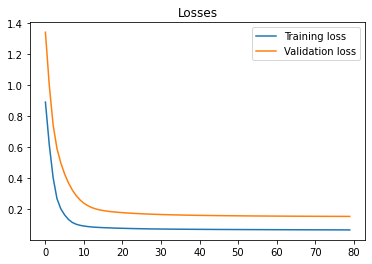

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.9138	 Validation loss: 1.3843
[2/80] Training loss: 0.6497	 Validation loss: 1.0509
[3/80] Training loss: 0.4341	 Validation loss: 0.7882
[4/80] Training loss: 0.2925	 Validation loss: 0.6282
[5/80] Training loss: 0.2235	 Validation loss: 0.5337
[6/80] Training loss: 0.1825	 Validation loss: 0.4621
[7/80] Training loss: 0.1500	 Validation loss: 0.4039
[8/80] Training loss: 0.1271	 Validation loss: 0.3561
[9/80] Training loss: 0.1127	 Validation loss: 0.3160
[10/80] Training loss: 0.1039	 Validation loss: 0.2831
[50/80] Training loss: 0.0726	 Validation loss: 0.1632


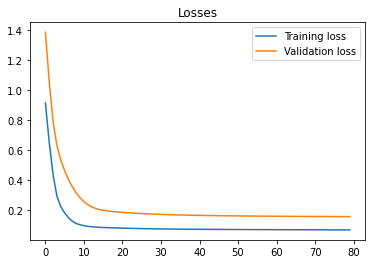

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7584	 Validation loss: 1.0003
[2/80] Training loss: 0.3547	 Validation loss: 0.5995
[3/80] Training loss: 0.1997	 Validation loss: 0.4101
[4/80] Training loss: 0.1364	 Validation loss: 0.2952
[5/80] Training loss: 0.1007	 Validation loss: 0.2270
[6/80] Training loss: 0.0861	 Validation loss: 0.1896
[7/80] Training loss: 0.0809	 Validation loss: 0.1673
[8/80] Training loss: 0.0784	 Validation loss: 0.1564
[9/80] Training loss: 0.0770	 Validation loss: 0.1521
[10/80] Training loss: 0.0758	 Validation loss: 0.1500
[50/80] Training loss: 0.0633	 Validation loss: 0.1233


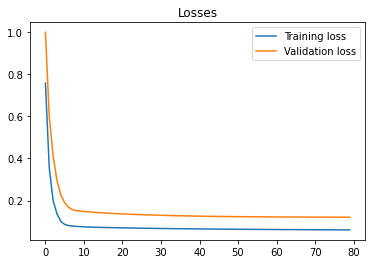

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8544	 Validation loss: 1.2355
[2/80] Training loss: 0.5028	 Validation loss: 0.8527
[3/80] Training loss: 0.2977	 Validation loss: 0.6261
[4/80] Training loss: 0.1971	 Validation loss: 0.4963
[5/80] Training loss: 0.1492	 Validation loss: 0.4125
[6/80] Training loss: 0.1219	 Validation loss: 0.3521
[7/80] Training loss: 0.1061	 Validation loss: 0.3062
[8/80] Training loss: 0.0967	 Validation loss: 0.2685
[9/80] Training loss: 0.0899	 Validation loss: 0.2387
[10/80] Training loss: 0.0849	 Validation loss: 0.2175
[50/80] Training loss: 0.0634	 Validation loss: 0.1394


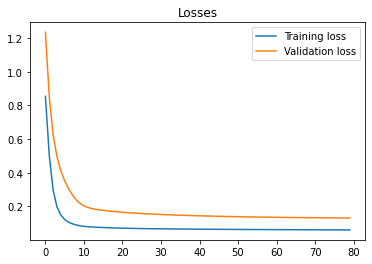

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8493	 Validation loss: 1.2183
[2/80] Training loss: 0.5075	 Validation loss: 0.8407
[3/80] Training loss: 0.3067	 Validation loss: 0.6239
[4/80] Training loss: 0.2149	 Validation loss: 0.5046
[5/80] Training loss: 0.1684	 Validation loss: 0.4213
[6/80] Training loss: 0.1345	 Validation loss: 0.3589
[7/80] Training loss: 0.1120	 Validation loss: 0.3115
[8/80] Training loss: 0.0987	 Validation loss: 0.2745
[9/80] Training loss: 0.0911	 Validation loss: 0.2469
[10/80] Training loss: 0.0865	 Validation loss: 0.2272
[50/80] Training loss: 0.0659	 Validation loss: 0.1513


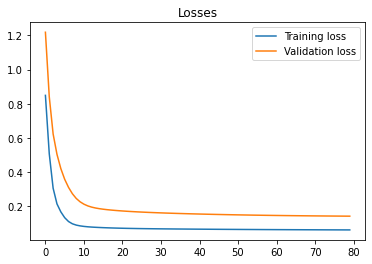

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8261	 Validation loss: 1.2310
[2/80] Training loss: 0.5174	 Validation loss: 0.8745
[3/80] Training loss: 0.3243	 Validation loss: 0.6540
[4/80] Training loss: 0.2273	 Validation loss: 0.5281
[5/80] Training loss: 0.1778	 Validation loss: 0.4417
[6/80] Training loss: 0.1422	 Validation loss: 0.3744
[7/80] Training loss: 0.1175	 Validation loss: 0.3233
[8/80] Training loss: 0.1028	 Validation loss: 0.2841
[9/80] Training loss: 0.0942	 Validation loss: 0.2551
[10/80] Training loss: 0.0892	 Validation loss: 0.2351
[50/80] Training loss: 0.0681	 Validation loss: 0.1663


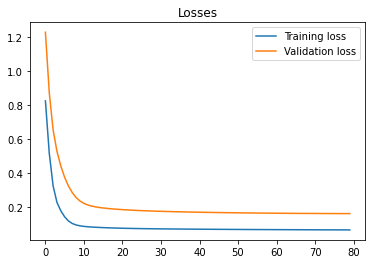

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8401	 Validation loss: 1.2916
[2/80] Training loss: 0.5444	 Validation loss: 0.9486
[3/80] Training loss: 0.3554	 Validation loss: 0.7289
[4/80] Training loss: 0.2550	 Validation loss: 0.6041
[5/80] Training loss: 0.2025	 Validation loss: 0.5195
[6/80] Training loss: 0.1652	 Validation loss: 0.4518
[7/80] Training loss: 0.1375	 Validation loss: 0.3962
[8/80] Training loss: 0.1192	 Validation loss: 0.3508
[9/80] Training loss: 0.1078	 Validation loss: 0.3140
[10/80] Training loss: 0.1004	 Validation loss: 0.2844
[50/80] Training loss: 0.0700	 Validation loss: 0.1655


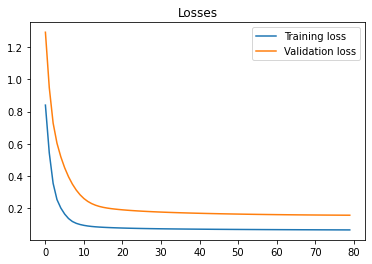

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7316	 Validation loss: 0.9845
[2/80] Training loss: 0.2962	 Validation loss: 0.5755
[3/80] Training loss: 0.1617	 Validation loss: 0.4044
[4/80] Training loss: 0.1173	 Validation loss: 0.3010
[5/80] Training loss: 0.0913	 Validation loss: 0.2461
[6/80] Training loss: 0.0822	 Validation loss: 0.2134
[7/80] Training loss: 0.0773	 Validation loss: 0.1895
[8/80] Training loss: 0.0744	 Validation loss: 0.1765
[9/80] Training loss: 0.0728	 Validation loss: 0.1707
[10/80] Training loss: 0.0715	 Validation loss: 0.1673
[50/80] Training loss: 0.0576	 Validation loss: 0.1253


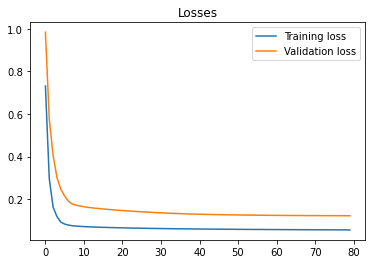

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7524	 Validation loss: 1.1315
[2/80] Training loss: 0.3961	 Validation loss: 0.7658
[3/80] Training loss: 0.2345	 Validation loss: 0.5832
[4/80] Training loss: 0.1704	 Validation loss: 0.4714
[5/80] Training loss: 0.1326	 Validation loss: 0.3924
[6/80] Training loss: 0.1106	 Validation loss: 0.3356
[7/80] Training loss: 0.0989	 Validation loss: 0.2900
[8/80] Training loss: 0.0914	 Validation loss: 0.2551
[9/80] Training loss: 0.0863	 Validation loss: 0.2310
[10/80] Training loss: 0.0827	 Validation loss: 0.2146
[50/80] Training loss: 0.0616	 Validation loss: 0.1418


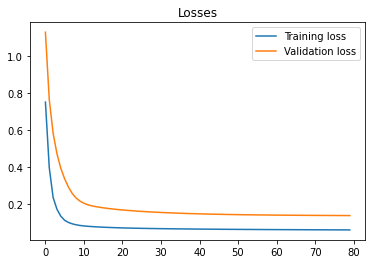

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7749	 Validation loss: 1.1411
[2/80] Training loss: 0.4362	 Validation loss: 0.7747
[3/80] Training loss: 0.2611	 Validation loss: 0.5772
[4/80] Training loss: 0.1852	 Validation loss: 0.4657
[5/80] Training loss: 0.1437	 Validation loss: 0.3867
[6/80] Training loss: 0.1168	 Validation loss: 0.3300
[7/80] Training loss: 0.1021	 Validation loss: 0.2863
[8/80] Training loss: 0.0933	 Validation loss: 0.2529
[9/80] Training loss: 0.0877	 Validation loss: 0.2295
[10/80] Training loss: 0.0841	 Validation loss: 0.2139
[50/80] Training loss: 0.0645	 Validation loss: 0.1477


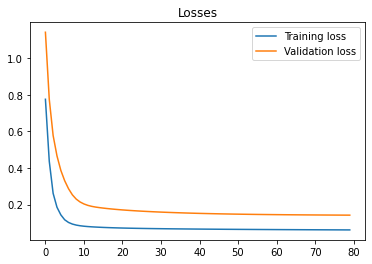

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8353	 Validation loss: 1.1876
[2/80] Training loss: 0.4959	 Validation loss: 0.8344
[3/80] Training loss: 0.3090	 Validation loss: 0.6355
[4/80] Training loss: 0.2217	 Validation loss: 0.5244
[5/80] Training loss: 0.1740	 Validation loss: 0.4446
[6/80] Training loss: 0.1390	 Validation loss: 0.3837
[7/80] Training loss: 0.1166	 Validation loss: 0.3377
[8/80] Training loss: 0.1039	 Validation loss: 0.3020
[9/80] Training loss: 0.0963	 Validation loss: 0.2747
[10/80] Training loss: 0.0914	 Validation loss: 0.2547
[50/80] Training loss: 0.0663	 Validation loss: 0.1619


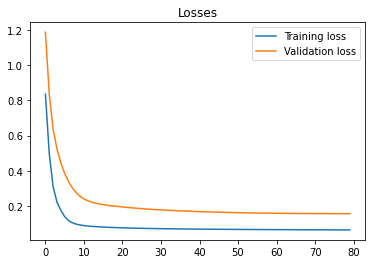

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8541	 Validation loss: 1.1973
[2/80] Training loss: 0.5305	 Validation loss: 0.8492
[3/80] Training loss: 0.3270	 Validation loss: 0.6287
[4/80] Training loss: 0.2198	 Validation loss: 0.5050
[5/80] Training loss: 0.1685	 Validation loss: 0.4273
[6/80] Training loss: 0.1364	 Validation loss: 0.3694
[7/80] Training loss: 0.1154	 Validation loss: 0.3255
[8/80] Training loss: 0.1036	 Validation loss: 0.2913
[9/80] Training loss: 0.0965	 Validation loss: 0.2651
[10/80] Training loss: 0.0919	 Validation loss: 0.2464
[50/80] Training loss: 0.0689	 Validation loss: 0.1687


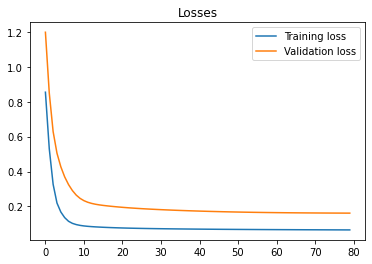

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8834	 Validation loss: 1.0582
[2/80] Training loss: 0.3646	 Validation loss: 0.6073
[3/80] Training loss: 0.1914	 Validation loss: 0.4245
[4/80] Training loss: 0.1358	 Validation loss: 0.3316
[5/80] Training loss: 0.1087	 Validation loss: 0.2747
[6/80] Training loss: 0.0927	 Validation loss: 0.2356
[7/80] Training loss: 0.0835	 Validation loss: 0.2104
[8/80] Training loss: 0.0789	 Validation loss: 0.1949
[9/80] Training loss: 0.0765	 Validation loss: 0.1848
[10/80] Training loss: 0.0746	 Validation loss: 0.1779
[50/80] Training loss: 0.0573	 Validation loss: 0.1313


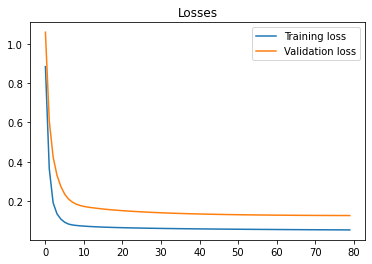

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7918	 Validation loss: 1.0637
[2/80] Training loss: 0.3744	 Validation loss: 0.6487
[3/80] Training loss: 0.2003	 Validation loss: 0.4615
[4/80] Training loss: 0.1419	 Validation loss: 0.3665
[5/80] Training loss: 0.1127	 Validation loss: 0.3033
[6/80] Training loss: 0.0954	 Validation loss: 0.2627
[7/80] Training loss: 0.0871	 Validation loss: 0.2339
[8/80] Training loss: 0.0823	 Validation loss: 0.2142
[9/80] Training loss: 0.0795	 Validation loss: 0.2020
[10/80] Training loss: 0.0777	 Validation loss: 0.1942
[50/80] Training loss: 0.0608	 Validation loss: 0.1423


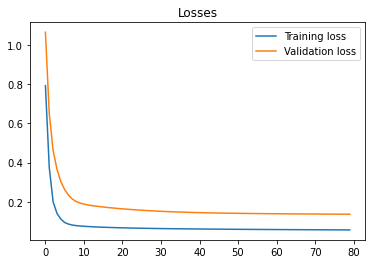

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7749	 Validation loss: 1.0764
[2/80] Training loss: 0.4133	 Validation loss: 0.7176
[3/80] Training loss: 0.2423	 Validation loss: 0.5359
[4/80] Training loss: 0.1727	 Validation loss: 0.4351
[5/80] Training loss: 0.1352	 Validation loss: 0.3651
[6/80] Training loss: 0.1114	 Validation loss: 0.3154
[7/80] Training loss: 0.0984	 Validation loss: 0.2786
[8/80] Training loss: 0.0912	 Validation loss: 0.2528
[9/80] Training loss: 0.0866	 Validation loss: 0.2356
[10/80] Training loss: 0.0835	 Validation loss: 0.2242
[50/80] Training loss: 0.0636	 Validation loss: 0.1617


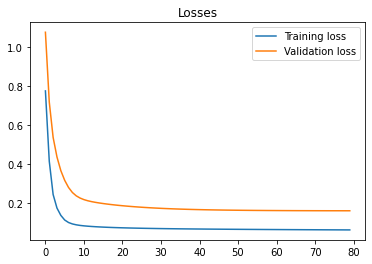

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7865	 Validation loss: 1.0776
[2/80] Training loss: 0.4358	 Validation loss: 0.7316
[3/80] Training loss: 0.2680	 Validation loss: 0.5617
[4/80] Training loss: 0.1996	 Validation loss: 0.4644
[5/80] Training loss: 0.1561	 Validation loss: 0.3932
[6/80] Training loss: 0.1250	 Validation loss: 0.3404
[7/80] Training loss: 0.1068	 Validation loss: 0.2999
[8/80] Training loss: 0.0969	 Validation loss: 0.2697
[9/80] Training loss: 0.0913	 Validation loss: 0.2485
[10/80] Training loss: 0.0875	 Validation loss: 0.2338
[50/80] Training loss: 0.0657	 Validation loss: 0.1614


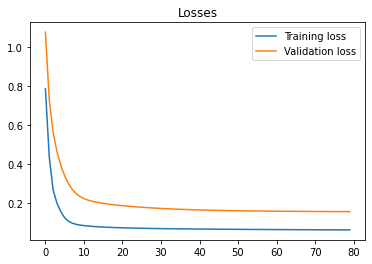

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7992	 Validation loss: 1.1402
[2/80] Training loss: 0.4641	 Validation loss: 0.7891
[3/80] Training loss: 0.2825	 Validation loss: 0.5983
[4/80] Training loss: 0.1990	 Validation loss: 0.4949
[5/80] Training loss: 0.1565	 Validation loss: 0.4254
[6/80] Training loss: 0.1291	 Validation loss: 0.3720
[7/80] Training loss: 0.1121	 Validation loss: 0.3300
[8/80] Training loss: 0.1019	 Validation loss: 0.2970
[9/80] Training loss: 0.0954	 Validation loss: 0.2719
[10/80] Training loss: 0.0910	 Validation loss: 0.2534
[50/80] Training loss: 0.0679	 Validation loss: 0.1749


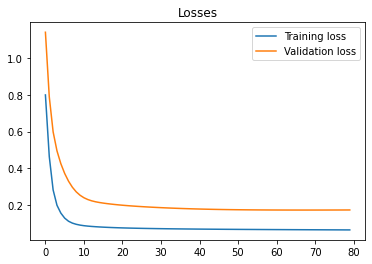

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7457	 Validation loss: 0.9840
[2/80] Training loss: 0.2875	 Validation loss: 0.5978
[3/80] Training loss: 0.1678	 Validation loss: 0.4315
[4/80] Training loss: 0.1202	 Validation loss: 0.3225
[5/80] Training loss: 0.0941	 Validation loss: 0.2644
[6/80] Training loss: 0.0839	 Validation loss: 0.2304
[7/80] Training loss: 0.0787	 Validation loss: 0.2106
[8/80] Training loss: 0.0761	 Validation loss: 0.2003
[9/80] Training loss: 0.0741	 Validation loss: 0.1949
[10/80] Training loss: 0.0725	 Validation loss: 0.1902
[50/80] Training loss: 0.0561	 Validation loss: 0.1471


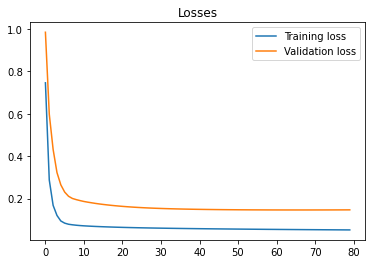

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7739	 Validation loss: 0.9996
[2/80] Training loss: 0.3501	 Validation loss: 0.6286
[3/80] Training loss: 0.1942	 Validation loss: 0.4661
[4/80] Training loss: 0.1396	 Validation loss: 0.3764
[5/80] Training loss: 0.1121	 Validation loss: 0.3213
[6/80] Training loss: 0.0982	 Validation loss: 0.2812
[7/80] Training loss: 0.0899	 Validation loss: 0.2523
[8/80] Training loss: 0.0850	 Validation loss: 0.2341
[9/80] Training loss: 0.0818	 Validation loss: 0.2224
[10/80] Training loss: 0.0794	 Validation loss: 0.2140
[50/80] Training loss: 0.0606	 Validation loss: 0.1548


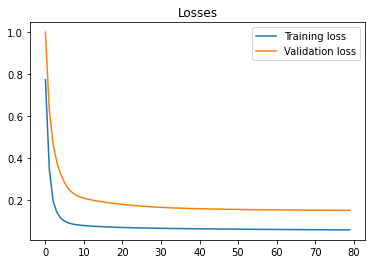

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8421	 Validation loss: 1.0820
[2/80] Training loss: 0.4369	 Validation loss: 0.6901
[3/80] Training loss: 0.2499	 Validation loss: 0.5008
[4/80] Training loss: 0.1761	 Validation loss: 0.4050
[5/80] Training loss: 0.1380	 Validation loss: 0.3433
[6/80] Training loss: 0.1127	 Validation loss: 0.3022
[7/80] Training loss: 0.0992	 Validation loss: 0.2738
[8/80] Training loss: 0.0918	 Validation loss: 0.2525
[9/80] Training loss: 0.0873	 Validation loss: 0.2378
[10/80] Training loss: 0.0843	 Validation loss: 0.2280
[50/80] Training loss: 0.0628	 Validation loss: 0.1597


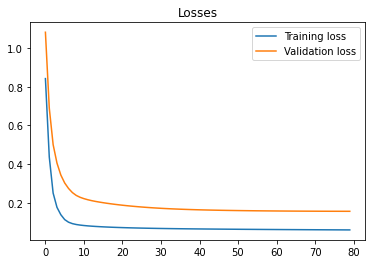

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8438	 Validation loss: 1.1653
[2/80] Training loss: 0.4730	 Validation loss: 0.7780
[3/80] Training loss: 0.2713	 Validation loss: 0.5640
[4/80] Training loss: 0.1793	 Validation loss: 0.4501
[5/80] Training loss: 0.1369	 Validation loss: 0.3773
[6/80] Training loss: 0.1134	 Validation loss: 0.3294
[7/80] Training loss: 0.1019	 Validation loss: 0.2953
[8/80] Training loss: 0.0953	 Validation loss: 0.2703
[9/80] Training loss: 0.0908	 Validation loss: 0.2531
[10/80] Training loss: 0.0877	 Validation loss: 0.2411
[50/80] Training loss: 0.0656	 Validation loss: 0.1693


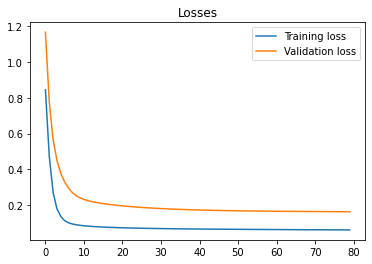

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8788	 Validation loss: 1.2257
[2/80] Training loss: 0.5101	 Validation loss: 0.8520
[3/80] Training loss: 0.3068	 Validation loss: 0.6381
[4/80] Training loss: 0.2081	 Validation loss: 0.5209
[5/80] Training loss: 0.1605	 Validation loss: 0.4465
[6/80] Training loss: 0.1323	 Validation loss: 0.3934
[7/80] Training loss: 0.1162	 Validation loss: 0.3532
[8/80] Training loss: 0.1071	 Validation loss: 0.3209
[9/80] Training loss: 0.1010	 Validation loss: 0.2956
[10/80] Training loss: 0.0964	 Validation loss: 0.2764
[50/80] Training loss: 0.0682	 Validation loss: 0.1734


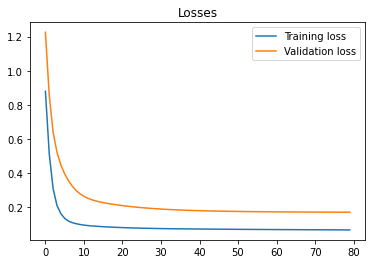

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.5236	 Validation loss: 0.6988
[2/80] Training loss: 0.2007	 Validation loss: 0.4389
[3/80] Training loss: 0.1292	 Validation loss: 0.3234
[4/80] Training loss: 0.0985	 Validation loss: 0.2612
[5/80] Training loss: 0.0851	 Validation loss: 0.2286
[6/80] Training loss: 0.0797	 Validation loss: 0.2123
[7/80] Training loss: 0.0770	 Validation loss: 0.2031
[8/80] Training loss: 0.0748	 Validation loss: 0.1972
[9/80] Training loss: 0.0730	 Validation loss: 0.1924
[10/80] Training loss: 0.0717	 Validation loss: 0.1880
[50/80] Training loss: 0.0534	 Validation loss: 0.1498


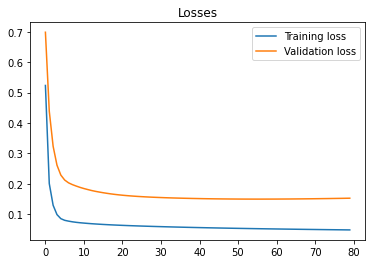

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7662	 Validation loss: 0.9066
[2/80] Training loss: 0.3250	 Validation loss: 0.5483
[3/80] Training loss: 0.1707	 Validation loss: 0.3967
[4/80] Training loss: 0.1240	 Validation loss: 0.3233
[5/80] Training loss: 0.1047	 Validation loss: 0.2801
[6/80] Training loss: 0.0935	 Validation loss: 0.2533
[7/80] Training loss: 0.0870	 Validation loss: 0.2364
[8/80] Training loss: 0.0831	 Validation loss: 0.2248
[9/80] Training loss: 0.0805	 Validation loss: 0.2163
[10/80] Training loss: 0.0786	 Validation loss: 0.2103
[50/80] Training loss: 0.0600	 Validation loss: 0.1607


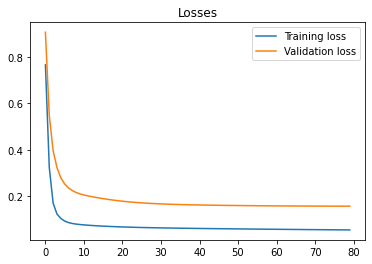

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8453	 Validation loss: 1.1148
[2/80] Training loss: 0.4233	 Validation loss: 0.7371
[3/80] Training loss: 0.2477	 Validation loss: 0.5648
[4/80] Training loss: 0.1787	 Validation loss: 0.4732
[5/80] Training loss: 0.1413	 Validation loss: 0.4114
[6/80] Training loss: 0.1185	 Validation loss: 0.3648
[7/80] Training loss: 0.1053	 Validation loss: 0.3274
[8/80] Training loss: 0.0970	 Validation loss: 0.2977
[9/80] Training loss: 0.0913	 Validation loss: 0.2745
[10/80] Training loss: 0.0870	 Validation loss: 0.2566
[50/80] Training loss: 0.0632	 Validation loss: 0.1704


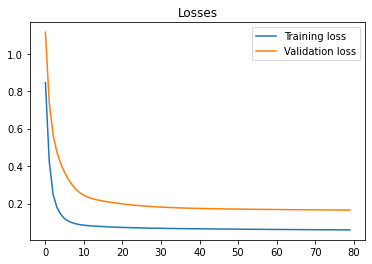

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7462	 Validation loss: 1.0065
[2/80] Training loss: 0.3808	 Validation loss: 0.6901
[3/80] Training loss: 0.2359	 Validation loss: 0.5462
[4/80] Training loss: 0.1788	 Validation loss: 0.4580
[5/80] Training loss: 0.1405	 Validation loss: 0.3983
[6/80] Training loss: 0.1173	 Validation loss: 0.3544
[7/80] Training loss: 0.1040	 Validation loss: 0.3183
[8/80] Training loss: 0.0962	 Validation loss: 0.2914
[9/80] Training loss: 0.0910	 Validation loss: 0.2720
[10/80] Training loss: 0.0872	 Validation loss: 0.2574
[50/80] Training loss: 0.0651	 Validation loss: 0.1749


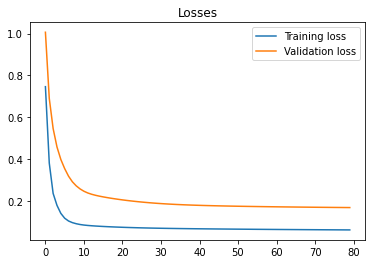

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8037	 Validation loss: 1.0437
[2/80] Training loss: 0.4318	 Validation loss: 0.7089
[3/80] Training loss: 0.2630	 Validation loss: 0.5502
[4/80] Training loss: 0.1932	 Validation loss: 0.4621
[5/80] Training loss: 0.1539	 Validation loss: 0.4014
[6/80] Training loss: 0.1282	 Validation loss: 0.3566
[7/80] Training loss: 0.1127	 Validation loss: 0.3223
[8/80] Training loss: 0.1035	 Validation loss: 0.2960
[9/80] Training loss: 0.0974	 Validation loss: 0.2756
[10/80] Training loss: 0.0930	 Validation loss: 0.2599
[50/80] Training loss: 0.0672	 Validation loss: 0.1824


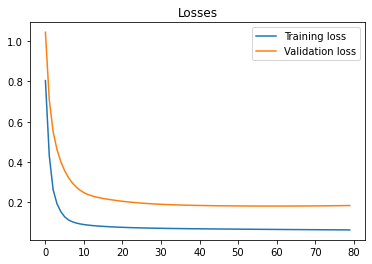

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.5369	 Validation loss: 0.6561
[2/80] Training loss: 0.1875	 Validation loss: 0.3868
[3/80] Training loss: 0.1187	 Validation loss: 0.2715
[4/80] Training loss: 0.0918	 Validation loss: 0.2296
[5/80] Training loss: 0.0838	 Validation loss: 0.2068
[6/80] Training loss: 0.0783	 Validation loss: 0.1929
[7/80] Training loss: 0.0756	 Validation loss: 0.1870
[8/80] Training loss: 0.0737	 Validation loss: 0.1824
[9/80] Training loss: 0.0721	 Validation loss: 0.1775
[10/80] Training loss: 0.0708	 Validation loss: 0.1730
[50/80] Training loss: 0.0539	 Validation loss: 0.1403


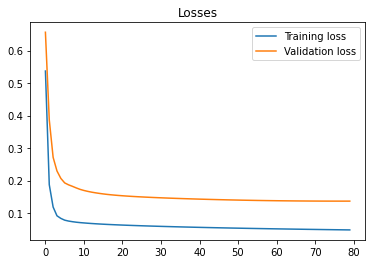

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7477	 Validation loss: 0.9231
[2/80] Training loss: 0.3206	 Validation loss: 0.5521
[3/80] Training loss: 0.1693	 Validation loss: 0.3976
[4/80] Training loss: 0.1217	 Validation loss: 0.3172
[5/80] Training loss: 0.1013	 Validation loss: 0.2715
[6/80] Training loss: 0.0922	 Validation loss: 0.2453
[7/80] Training loss: 0.0870	 Validation loss: 0.2284
[8/80] Training loss: 0.0834	 Validation loss: 0.2175
[9/80] Training loss: 0.0809	 Validation loss: 0.2101
[10/80] Training loss: 0.0787	 Validation loss: 0.2041
[50/80] Training loss: 0.0592	 Validation loss: 0.1540


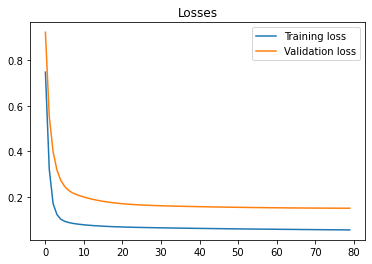

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7606	 Validation loss: 0.9893
[2/80] Training loss: 0.3645	 Validation loss: 0.6801
[3/80] Training loss: 0.2341	 Validation loss: 0.5460
[4/80] Training loss: 0.1808	 Validation loss: 0.4617
[5/80] Training loss: 0.1442	 Validation loss: 0.3928
[6/80] Training loss: 0.1184	 Validation loss: 0.3379
[7/80] Training loss: 0.1029	 Validation loss: 0.2987
[8/80] Training loss: 0.0946	 Validation loss: 0.2711
[9/80] Training loss: 0.0898	 Validation loss: 0.2510
[10/80] Training loss: 0.0865	 Validation loss: 0.2367
[50/80] Training loss: 0.0626	 Validation loss: 0.1623


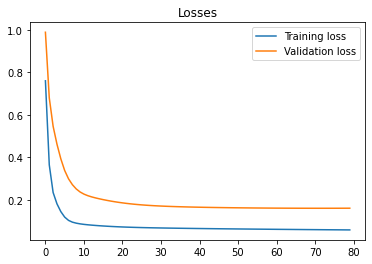

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8253	 Validation loss: 1.0632
[2/80] Training loss: 0.4171	 Validation loss: 0.7132
[3/80] Training loss: 0.2511	 Validation loss: 0.5551
[4/80] Training loss: 0.1852	 Validation loss: 0.4654
[5/80] Training loss: 0.1461	 Validation loss: 0.3996
[6/80] Training loss: 0.1204	 Validation loss: 0.3516
[7/80] Training loss: 0.1059	 Validation loss: 0.3152
[8/80] Training loss: 0.0978	 Validation loss: 0.2880
[9/80] Training loss: 0.0925	 Validation loss: 0.2682
[10/80] Training loss: 0.0887	 Validation loss: 0.2531
[50/80] Training loss: 0.0655	 Validation loss: 0.1743


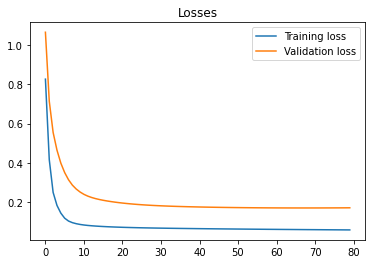

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8228	 Validation loss: 1.0766
[2/80] Training loss: 0.4466	 Validation loss: 0.7352
[3/80] Training loss: 0.2717	 Validation loss: 0.5676
[4/80] Training loss: 0.1995	 Validation loss: 0.4812
[5/80] Training loss: 0.1609	 Validation loss: 0.4169
[6/80] Training loss: 0.1320	 Validation loss: 0.3665
[7/80] Training loss: 0.1134	 Validation loss: 0.3292
[8/80] Training loss: 0.1027	 Validation loss: 0.3018
[9/80] Training loss: 0.0964	 Validation loss: 0.2815
[10/80] Training loss: 0.0922	 Validation loss: 0.2666
[50/80] Training loss: 0.0667	 Validation loss: 0.1838


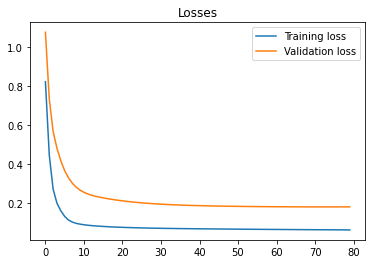

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6001	 Validation loss: 0.6846
[2/80] Training loss: 0.2010	 Validation loss: 0.3872
[3/80] Training loss: 0.1162	 Validation loss: 0.2892
[4/80] Training loss: 0.0971	 Validation loss: 0.2420
[5/80] Training loss: 0.0869	 Validation loss: 0.2207
[6/80] Training loss: 0.0808	 Validation loss: 0.2098
[7/80] Training loss: 0.0776	 Validation loss: 0.2016
[8/80] Training loss: 0.0753	 Validation loss: 0.1949
[9/80] Training loss: 0.0736	 Validation loss: 0.1894
[10/80] Training loss: 0.0722	 Validation loss: 0.1849
[50/80] Training loss: 0.0532	 Validation loss: 0.1410


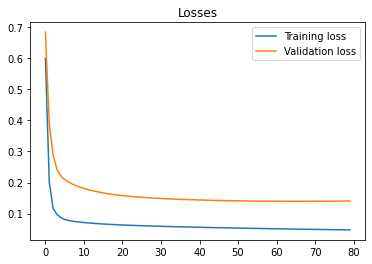

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6421	 Validation loss: 0.8385
[2/80] Training loss: 0.2703	 Validation loss: 0.5566
[3/80] Training loss: 0.1660	 Validation loss: 0.4286
[4/80] Training loss: 0.1236	 Validation loss: 0.3492
[5/80] Training loss: 0.1033	 Validation loss: 0.3022
[6/80] Training loss: 0.0941	 Validation loss: 0.2714
[7/80] Training loss: 0.0885	 Validation loss: 0.2508
[8/80] Training loss: 0.0848	 Validation loss: 0.2373
[9/80] Training loss: 0.0821	 Validation loss: 0.2274
[10/80] Training loss: 0.0799	 Validation loss: 0.2195
[50/80] Training loss: 0.0584	 Validation loss: 0.1573


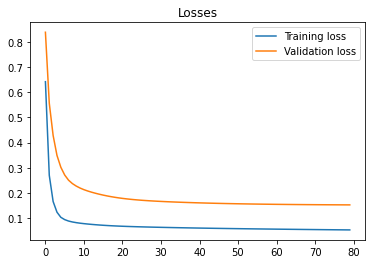

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7975	 Validation loss: 1.0129
[2/80] Training loss: 0.3714	 Validation loss: 0.6591
[3/80] Training loss: 0.2089	 Validation loss: 0.5025
[4/80] Training loss: 0.1524	 Validation loss: 0.4179
[5/80] Training loss: 0.1244	 Validation loss: 0.3638
[6/80] Training loss: 0.1086	 Validation loss: 0.3245
[7/80] Training loss: 0.0989	 Validation loss: 0.2934
[8/80] Training loss: 0.0923	 Validation loss: 0.2695
[9/80] Training loss: 0.0877	 Validation loss: 0.2514
[10/80] Training loss: 0.0842	 Validation loss: 0.2378
[50/80] Training loss: 0.0613	 Validation loss: 0.1695


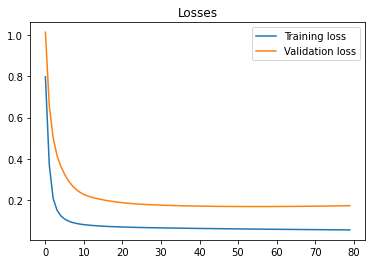

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8556	 Validation loss: 1.0888
[2/80] Training loss: 0.4400	 Validation loss: 0.7135
[3/80] Training loss: 0.2537	 Validation loss: 0.5251
[4/80] Training loss: 0.1745	 Validation loss: 0.4283
[5/80] Training loss: 0.1353	 Validation loss: 0.3644
[6/80] Training loss: 0.1121	 Validation loss: 0.3228
[7/80] Training loss: 0.1007	 Validation loss: 0.2931
[8/80] Training loss: 0.0942	 Validation loss: 0.2716
[9/80] Training loss: 0.0899	 Validation loss: 0.2568
[10/80] Training loss: 0.0868	 Validation loss: 0.2463
[50/80] Training loss: 0.0639	 Validation loss: 0.1736


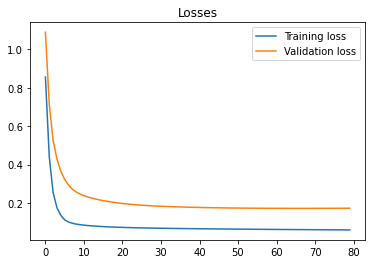

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8349	 Validation loss: 1.0606
[2/80] Training loss: 0.4337	 Validation loss: 0.7172
[3/80] Training loss: 0.2638	 Validation loss: 0.5529
[4/80] Training loss: 0.1951	 Validation loss: 0.4561
[5/80] Training loss: 0.1531	 Validation loss: 0.3893
[6/80] Training loss: 0.1251	 Validation loss: 0.3429
[7/80] Training loss: 0.1091	 Validation loss: 0.3089
[8/80] Training loss: 0.1002	 Validation loss: 0.2845
[9/80] Training loss: 0.0950	 Validation loss: 0.2670
[10/80] Training loss: 0.0914	 Validation loss: 0.2540
[50/80] Training loss: 0.0658	 Validation loss: 0.1795


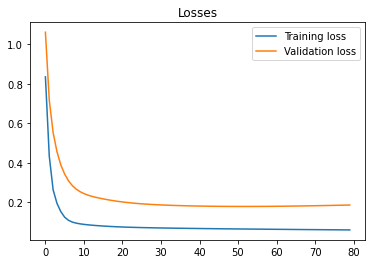

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6057	 Validation loss: 0.6684
[2/80] Training loss: 0.1922	 Validation loss: 0.4046
[3/80] Training loss: 0.1247	 Validation loss: 0.2982
[4/80] Training loss: 0.0985	 Validation loss: 0.2583
[5/80] Training loss: 0.0888	 Validation loss: 0.2305
[6/80] Training loss: 0.0815	 Validation loss: 0.2153
[7/80] Training loss: 0.0785	 Validation loss: 0.2063
[8/80] Training loss: 0.0760	 Validation loss: 0.1992
[9/80] Training loss: 0.0738	 Validation loss: 0.1923
[10/80] Training loss: 0.0721	 Validation loss: 0.1872
[50/80] Training loss: 0.0521	 Validation loss: 0.1446


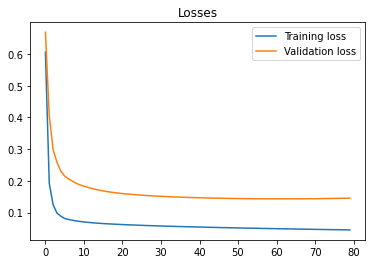

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6323	 Validation loss: 0.8149
[2/80] Training loss: 0.2525	 Validation loss: 0.5013
[3/80] Training loss: 0.1555	 Validation loss: 0.3729
[4/80] Training loss: 0.1173	 Validation loss: 0.3025
[5/80] Training loss: 0.0992	 Validation loss: 0.2623
[6/80] Training loss: 0.0907	 Validation loss: 0.2381
[7/80] Training loss: 0.0858	 Validation loss: 0.2241
[8/80] Training loss: 0.0827	 Validation loss: 0.2149
[9/80] Training loss: 0.0803	 Validation loss: 0.2082
[10/80] Training loss: 0.0783	 Validation loss: 0.2030
[50/80] Training loss: 0.0569	 Validation loss: 0.1603


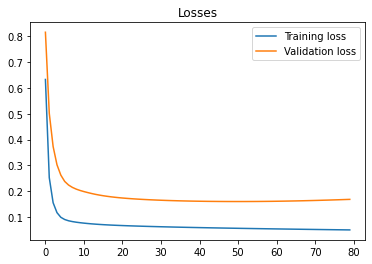

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6972	 Validation loss: 0.8530
[2/80] Training loss: 0.3130	 Validation loss: 0.5581
[3/80] Training loss: 0.1913	 Validation loss: 0.4300
[4/80] Training loss: 0.1411	 Validation loss: 0.3540
[5/80] Training loss: 0.1132	 Validation loss: 0.3040
[6/80] Training loss: 0.0995	 Validation loss: 0.2736
[7/80] Training loss: 0.0926	 Validation loss: 0.2541
[8/80] Training loss: 0.0883	 Validation loss: 0.2409
[9/80] Training loss: 0.0853	 Validation loss: 0.2314
[10/80] Training loss: 0.0829	 Validation loss: 0.2242
[50/80] Training loss: 0.0617	 Validation loss: 0.1671


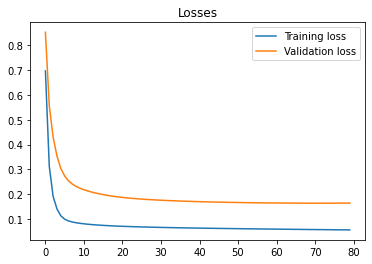

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8570	 Validation loss: 1.1108
[2/80] Training loss: 0.4365	 Validation loss: 0.7411
[3/80] Training loss: 0.2652	 Validation loss: 0.5681
[4/80] Training loss: 0.1902	 Validation loss: 0.4685
[5/80] Training loss: 0.1482	 Validation loss: 0.4037
[6/80] Training loss: 0.1243	 Validation loss: 0.3590
[7/80] Training loss: 0.1108	 Validation loss: 0.3257
[8/80] Training loss: 0.1028	 Validation loss: 0.3008
[9/80] Training loss: 0.0976	 Validation loss: 0.2825
[10/80] Training loss: 0.0936	 Validation loss: 0.2689
[50/80] Training loss: 0.0638	 Validation loss: 0.1870


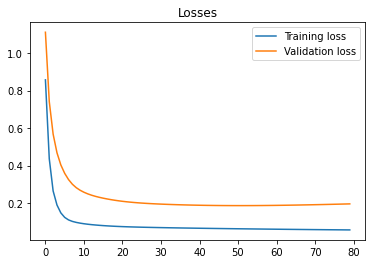

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.8414	 Validation loss: 1.0570
[2/80] Training loss: 0.4493	 Validation loss: 0.7134
[3/80] Training loss: 0.2690	 Validation loss: 0.5464
[4/80] Training loss: 0.1905	 Validation loss: 0.4559
[5/80] Training loss: 0.1496	 Validation loss: 0.3963
[6/80] Training loss: 0.1256	 Validation loss: 0.3547
[7/80] Training loss: 0.1120	 Validation loss: 0.3242
[8/80] Training loss: 0.1038	 Validation loss: 0.3015
[9/80] Training loss: 0.0983	 Validation loss: 0.2847
[10/80] Training loss: 0.0942	 Validation loss: 0.2723
[50/80] Training loss: 0.0658	 Validation loss: 0.1850


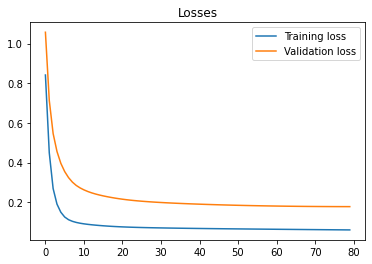

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.5473	 Validation loss: 0.5729
[2/80] Training loss: 0.1817	 Validation loss: 0.3548
[3/80] Training loss: 0.1230	 Validation loss: 0.2752
[4/80] Training loss: 0.0987	 Validation loss: 0.2435
[5/80] Training loss: 0.0880	 Validation loss: 0.2215
[6/80] Training loss: 0.0819	 Validation loss: 0.2085
[7/80] Training loss: 0.0788	 Validation loss: 0.2010
[8/80] Training loss: 0.0762	 Validation loss: 0.1954
[9/80] Training loss: 0.0740	 Validation loss: 0.1903
[10/80] Training loss: 0.0722	 Validation loss: 0.1857
[50/80] Training loss: 0.0503	 Validation loss: 0.1480


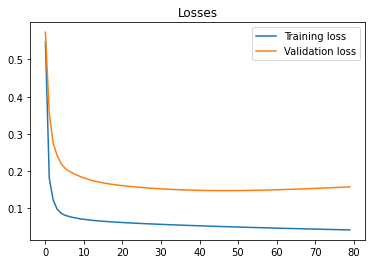

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.5746	 Validation loss: 0.7260
[2/80] Training loss: 0.2342	 Validation loss: 0.4678
[3/80] Training loss: 0.1429	 Validation loss: 0.3606
[4/80] Training loss: 0.1142	 Validation loss: 0.3027
[5/80] Training loss: 0.0999	 Validation loss: 0.2692
[6/80] Training loss: 0.0924	 Validation loss: 0.2528
[7/80] Training loss: 0.0874	 Validation loss: 0.2407
[8/80] Training loss: 0.0835	 Validation loss: 0.2296
[9/80] Training loss: 0.0807	 Validation loss: 0.2207
[10/80] Training loss: 0.0784	 Validation loss: 0.2136
[50/80] Training loss: 0.0565	 Validation loss: 0.1582


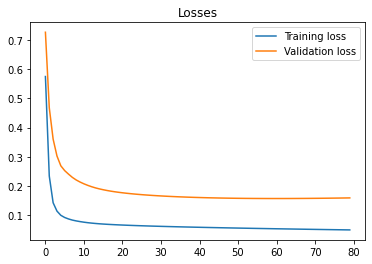

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6819	 Validation loss: 0.8273
[2/80] Training loss: 0.3056	 Validation loss: 0.5650
[3/80] Training loss: 0.2055	 Validation loss: 0.4581
[4/80] Training loss: 0.1578	 Validation loss: 0.3923
[5/80] Training loss: 0.1281	 Validation loss: 0.3440
[6/80] Training loss: 0.1117	 Validation loss: 0.3095
[7/80] Training loss: 0.1018	 Validation loss: 0.2839
[8/80] Training loss: 0.0953	 Validation loss: 0.2652
[9/80] Training loss: 0.0906	 Validation loss: 0.2507
[10/80] Training loss: 0.0871	 Validation loss: 0.2393
[50/80] Training loss: 0.0614	 Validation loss: 0.1628


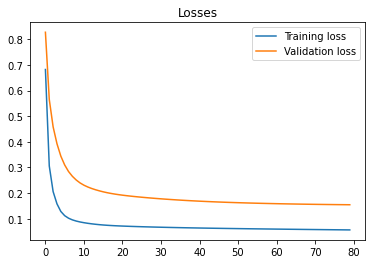

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.6988	 Validation loss: 0.8517
[2/80] Training loss: 0.3289	 Validation loss: 0.5833
[3/80] Training loss: 0.2095	 Validation loss: 0.4645
[4/80] Training loss: 0.1594	 Validation loss: 0.3913
[5/80] Training loss: 0.1287	 Validation loss: 0.3413
[6/80] Training loss: 0.1115	 Validation loss: 0.3044
[7/80] Training loss: 0.1019	 Validation loss: 0.2777
[8/80] Training loss: 0.0963	 Validation loss: 0.2604
[9/80] Training loss: 0.0925	 Validation loss: 0.2490
[10/80] Training loss: 0.0894	 Validation loss: 0.2400
[50/80] Training loss: 0.0644	 Validation loss: 0.1707


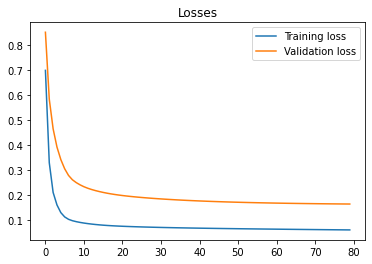

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/80] Training loss: 0.7470	 Validation loss: 0.9548
[2/80] Training loss: 0.3846	 Validation loss: 0.6559
[3/80] Training loss: 0.2405	 Validation loss: 0.5179
[4/80] Training loss: 0.1817	 Validation loss: 0.4371
[5/80] Training loss: 0.1479	 Validation loss: 0.3825
[6/80] Training loss: 0.1268	 Validation loss: 0.3457
[7/80] Training loss: 0.1143	 Validation loss: 0.3188
[8/80] Training loss: 0.1066	 Validation loss: 0.2986
[9/80] Training loss: 0.1012	 Validation loss: 0.2829
[10/80] Training loss: 0.0970	 Validation loss: 0.2698
[50/80] Training loss: 0.0662	 Validation loss: 0.1797


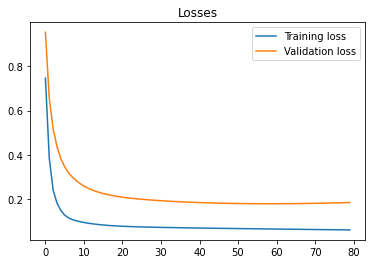

In [47]:
#Train multiple networks to evaluate the performance of the network on different time periods
MSE_avgs_test= np.zeros((len(input_lengths), len(output_lengths)))
MSE_totals_test = np.zeros((len(input_lengths), len(output_lengths)))
for ind_i, i in enumerate(input_lengths):
    for ind_j, j in enumerate(output_lengths):
        lags_generated = i+j
        df_generated_2 = generate_time_lags(df_pharm_approved_dates, lags_generated, 'total_claims')
        x_vals = df_generated_2['dim_date_id']
        df_generated_2 = df_generated_2.drop(['dim_date_id'], axis =1)
        X = df_generated_2.loc[:,'lag1':f'lag{i}']
        Y = df_generated_2.loc[:,f'lag{i+1}':]
        scaler, train_loader, val_loader, test_loader, test_loader_one, X_train, y_train = generate_loaders(X, Y, test_ratio = 0.2)
        input_dim = len(X_train.columns)
        output_dim = len(y_train.columns)
        hidden_dim = 64
        layer_dim = 1
        batch_size = 64
        dropout = 0.2
        n_epochs = 80
        learning_rate = 1e-3
        weight_decay = 1e-6
        
        model_params = {'input_dim': input_dim,
                        'hidden_dim': hidden_dim,
                        'layer_dim': layer_dim,
                        'output_dim': output_dim,
                        'dropout_prob': dropout}
        # Initialize network
        model_rnn = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout).to(device)
        # Define loss Function
        loss_fn = nn.MSELoss(reduction="mean")
        #Define the training method
        optimizer = optim.Adam(model_rnn.parameters(), lr=learning_rate, weight_decay=weight_decay)
        #initialize the optimizer
        opt = Optimization(model=model_rnn, loss_fn=loss_fn, optimizer=optimizer)
        
        #train the model
        opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
        opt.plot_losses()
        #evaluate performance on the test dataset to compare
        predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)
        
        
        preds_descaled = []
        
        for k in range(len(predictions)):
            preds_descaled.append(scaler.inverse_transform(predictions[k]))
            
        vals_descaled = []
        for k in range(len(predictions)):
            vals_descaled.append(scaler.inverse_transform(values[k]))
        
        preds_all = preds_descaled[-1][0]
        for k in range(2,len(preds_descaled),7):
            preds_all = np.append(preds_all, preds_descaled[-k][0][:])
           
        vals_all = vals_descaled[-1][0]
        for k in range(2,len(predictions),7):
            vals_all = np.append(vals_all, vals_descaled[-k][0][:]) 
        
        MSE_avgs_test[ind_i,ind_j] = get_avg_MSE(vals_descaled, preds_descaled)
        
        MSE_totals_test[ind_i,ind_j] = get_MSE(preds_all, vals_all)

In [48]:
fig = plt.figure(dpi = 2400)
for ind_j, j in enumerate(output_lengths):
    plt.plot(input_lengths, MSE_avgs_test[:,ind_j], label = str(j))
plt.axvline(x=50)
plt.xlabel('number of days used for prediction')   
plt.ylabel('RMSE on test Dataset') 
fig.legend()


C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/150] Training loss: 0.7474	 Validation loss: 0.9069
[2/150] Training loss: 0.3062	 Validation loss: 0.5237
[3/150] Training loss: 0.1682	 Validation loss: 0.3736
[4/150] Training loss: 0.1232	 Validation loss: 0.2864
[5/150] Training loss: 0.0944	 Validation loss: 0.2398
[6/150] Training loss: 0.0830	 Validation loss: 0.2122
[7/150] Training loss: 0.0777	 Validation loss: 0.1904
[8/150] Training loss: 0.0746	 Validation loss: 0.1774
[9/150] Training loss: 0.0730	 Validation loss: 0.1713
[10/150] Training loss: 0.0717	 Validation loss: 0.1681
[50/150] Training loss: 0.0577	 Validation loss: 0.1262
[100/150] Training loss: 0.0531	 Validation loss: 0.1200
[150/150] Training loss: 0.0499	 Validation loss: 0.1182


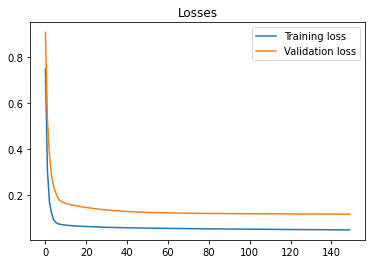

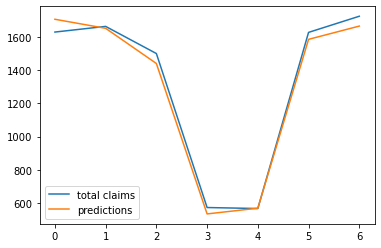

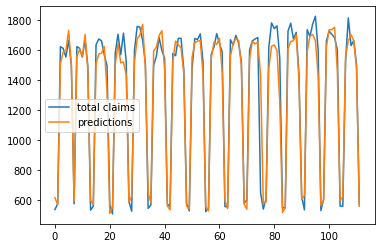

In [76]:
i=50
j = 7
lags_generated = i+j
df_generated_2 = generate_time_lags(df_pharm_approved_dates, lags_generated, 'total_claims')
x_vals = df_generated_2['dim_date_id']
df_generated_2 = df_generated_2.drop(['dim_date_id'], axis =1)
X = df_generated_2.loc[:,'lag1':f'lag{i}']
Y = df_generated_2.loc[:,f'lag{i+1}':]
scaler, train_loader, val_loader, test_loader, test_loader_one, X_train, y_train = generate_loaders(X, Y, test_ratio = 0.2)
input_dim = len(X_train.columns)
output_dim = len(y_train.columns)
hidden_dim = 64
layer_dim = 1
#batch_size = 64
dropout = 0.2
n_epochs = 150
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
'hidden_dim': hidden_dim,
'layer_dim': layer_dim,
'output_dim': output_dim,
'dropout_prob': dropout}

model_rnn = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model_rnn.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model_rnn, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)


preds_descaled = []

for k in range(len(predictions)):
    preds_descaled.append(scaler.inverse_transform(predictions[k]))

vals_descaled = []
for k in range(len(predictions)):
    vals_descaled.append(scaler.inverse_transform(values[k]))

preds_all = preds_descaled[-1][0]
for k in range(2,len(preds_descaled),7):
    preds_all = np.append(preds_all, preds_descaled[-k][0][:])
    

vals_all = vals_descaled[-1][0]
for k in range(2,len(predictions),7):
    vals_all = np.append(vals_all, vals_descaled[-k][0][:]) 

MSE_total = get_avg_MSE(vals_descaled, preds_descaled)

fig = plt.figure()
plt.plot(range(len(vals_descaled[0][0])), vals_descaled[0][0], label='total claims')
plt.plot(range(len(preds_descaled[0][0])), preds_descaled[0][0], label='predictions')
plt.legend()

fig = plt.figure()
plt.plot(range(len(vals_all)), vals_all, label='total claims')
plt.plot(range(len(preds_all)), preds_all, label='predictions')
plt.legend()

In [ ]:
#pa_approved, total_claims, pharmacy_claims_approved

C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[1/150] Training loss: 0.7616	 Validation loss: 0.9890
[2/150] Training loss: 0.3472	 Validation loss: 0.5926
[3/150] Training loss: 0.1897	 Validation loss: 0.4261
[4/150] Training loss: 0.1381	 Validation loss: 0.3360
[5/150] Training loss: 0.1124	 Validation loss: 0.2810
[6/150] Training loss: 0.0997	 Validation loss: 0.2448
[7/150] Training loss: 0.0927	 Validation loss: 0.2191
[8/150] Training loss: 0.0885	 Validation loss: 0.2035
[9/150] Training loss: 0.0863	 Validation loss: 0.1952
[10/150] Training loss: 0.0848	 Validation loss: 0.1902
[50/150] Training loss: 0.0687	 Validation loss: 0.1467
[100/150] Training loss: 0.0636	 Validation loss: 0.1431
[150/150] Training loss: 0.0594	 Validation loss: 0.1449


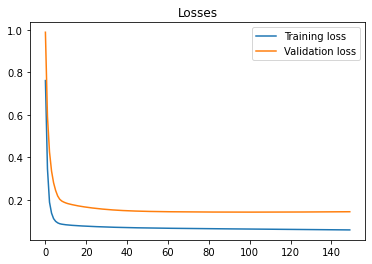

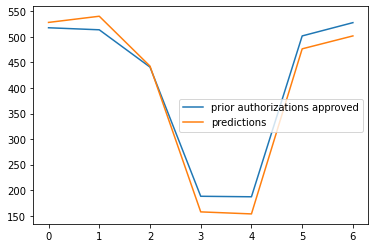

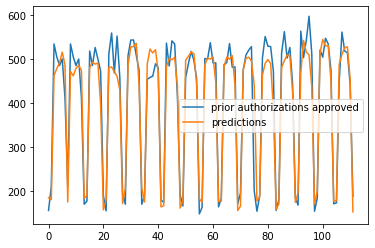

In [77]:
#train an RNN to predict pa_approved
days_in=50
days_out = 7
df_pa_approved_dates = dates_join.loc[:,['dim_date_id', 'pa_approved']]
df_generated_2 = generate_time_lags(df_pa_approved_dates, lags_generated, 'pa_approved')
x_vals = df_generated_2['dim_date_id']
df_generated_2 = df_generated_2.drop(['dim_date_id'], axis =1)
X = df_generated_2.loc[:,'lag1':f'lag{days_in}']
Y = df_generated_2.loc[:,f'lag{days_in+1}':]
scaler, train_loader, val_loader, test_loader, test_loader_one, X_train, y_train = generate_loaders(X, Y, test_ratio = 0.2)
input_dim = len(X_train.columns)
output_dim = len(y_train.columns)
hidden_dim = 64
layer_dim = 1
#batch_size = 64
dropout = 0.2
n_epochs = 150
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
'hidden_dim': hidden_dim,
'layer_dim': layer_dim,
'output_dim': output_dim,
'dropout_prob': dropout}

model_rnn = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model_rnn.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model_rnn, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)


preds_descaled = []

for k in range(len(predictions)):
    preds_descaled.append(scaler.inverse_transform(predictions[k]))

vals_descaled = []
for k in range(len(predictions)):
    vals_descaled.append(scaler.inverse_transform(values[k]))

preds_all = preds_descaled[-1][0]
for k in range(2,len(preds_descaled),7):
    preds_all = np.append(preds_all, preds_descaled[-k][0][:])

    
vals_all = vals_descaled[-1][0]
for k in range(2,len(predictions),7):
    vals_all = np.append(vals_all, vals_descaled[-k][0][:]) 

MSE_pa = get_avg_MSE(vals_descaled, preds_descaled)

fig = plt.figure()
plt.plot(range(len(vals_descaled[0][0])), vals_descaled[0][0], label='prior authorizations approved')
plt.plot(range(len(preds_descaled[0][0])), preds_descaled[0][0], label='predictions')
plt.legend()

fig = plt.figure()
plt.plot(range(len(vals_all)), vals_all, label='prior authorizations approved')
plt.plot(range(len(preds_all)), preds_all, label='predictions')
plt.legend()

      dim_date_id  pa_approved
0               1         63.0
1               2        308.0
2               3        428.0
3               4        412.0
4               5        441.0
...           ...          ...
1090         1091        502.0
1091         1092        200.0
1092         1093        167.0
1093         1094        452.0
1094         1095        548.0

[1095 rows x 2 columns]
[1/150] Training loss: 0.7483	 Validation loss: 1.0272
[2/150] Training loss: 0.3329	 Validation loss: 0.6149
[3/150] Training loss: 0.1739	 Validation loss: 0.4188
[4/150] Training loss: 0.1199	 Validation loss: 0.3080
[5/150] Training loss: 0.0952	 Validation loss: 0.2451
[6/150] Training loss: 0.0852	 Validation loss: 0.2081
[7/150] Training loss: 0.0803	 Validation loss: 0.1851


C:\Users\apost\miniconda3\envs\torch_nightly\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[8/150] Training loss: 0.0776	 Validation loss: 0.1734
[9/150] Training loss: 0.0761	 Validation loss: 0.1680
[10/150] Training loss: 0.0749	 Validation loss: 0.1645
[50/150] Training loss: 0.0624	 Validation loss: 0.1312
[100/150] Training loss: 0.0582	 Validation loss: 0.1285
[150/150] Training loss: 0.0547	 Validation loss: 0.1309


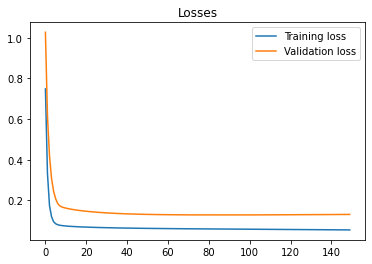

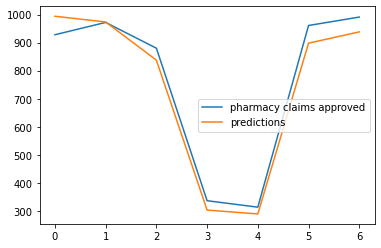

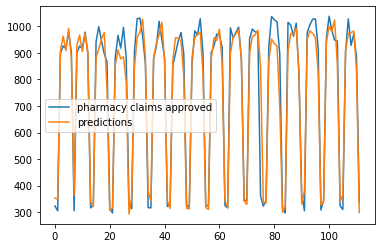

In [75]:
#train an RNN to predict pa_approved
days_in=50
days_out = 7
lags_generated = days_in+days_out
df_pharmacy_approved_dates = dates_join.loc[:,['dim_date_id', 'pharmacy_claim_approved']]
df_generated_2 = generate_time_lags(df_pharmacy_approved_dates, lags_generated, 'pharmacy_claim_approved')
print(df_pa_approved_dates)
x_vals = df_generated_2['dim_date_id']
df_generated_2 = df_generated_2.drop(['dim_date_id'], axis =1)
X = df_generated_2.loc[:,'lag1':f'lag{days_in}']
Y = df_generated_2.loc[:,f'lag{days_in+1}':]
scaler, train_loader, val_loader, test_loader, test_loader_one, X_train, y_train = generate_loaders(X, Y, test_ratio = 0.2)
input_dim = len(X_train.columns)
output_dim = len(y_train.columns)
hidden_dim = 64
layer_dim = 1
#batch_size = 64
dropout = 0.2
n_epochs = 150
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
'hidden_dim': hidden_dim,
'layer_dim': layer_dim,
'output_dim': output_dim,
'dropout_prob': dropout}

model_rnn = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model_rnn.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model_rnn, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)


preds_descaled = []

for k in range(len(predictions)):
    preds_descaled.append(scaler.inverse_transform(predictions[k]))

vals_descaled = []
for k in range(len(predictions)):
    vals_descaled.append(scaler.inverse_transform(values[k]))

preds_all = preds_descaled[-1][0]
for k in range(2,len(preds_descaled),7):
    preds_all = np.append(preds_all, preds_descaled[-k][0][:])
  
#foo = 1
vals_all = vals_descaled[-1][0]
for k in range(2,len(predictions),7):
    vals_all = np.append(vals_all, vals_descaled[-k][0][:]) 

MSE_pharm = get_avg_MSE(vals_descaled, preds_descaled)
fig = plt.figure()
plt.plot(range(len(vals_descaled[0][0])), vals_descaled[0][0], label='pharmacy claims approved')
plt.plot(range(len(preds_descaled[0][0])), preds_descaled[0][0], label='predictions')
plt.legend()

fig = plt.figure()
plt.plot(range(len(vals_all)), vals_all, label='pharmacy claims approved')
plt.plot(range(len(preds_all)), preds_all, label='predictions')
plt.legend()

In [81]:
print('7 days predicted at a time using the immediate 50 days prior to the days predicted')
print('MSE of total claims = ', int(MSE_total))
print('MSE of pharmacy approved claims = ', int(MSE_pharm))
print('MSE of prior authorizations approved = ', int(MSE_pa))

7 days predicted at a time using the immediate 50 days prior to the days predicted
MSE of total claims =  12653
MSE of pharmacy approved claims =  4709
MSE of prior authorizations approved =  1788


In [79]:
print('Using Holts seasonality:')
print('MSE of total claims = ', 23157)
print('MSE of pharmacy approved claims = ', 8357)
print('MSE of prior authorizations approved = ', 2445)

Using Holts seasonality:
MSE of total claims =  23157
MSE of pharmacy approved claims =  8357
MSE of prior authorizations approved =  2445


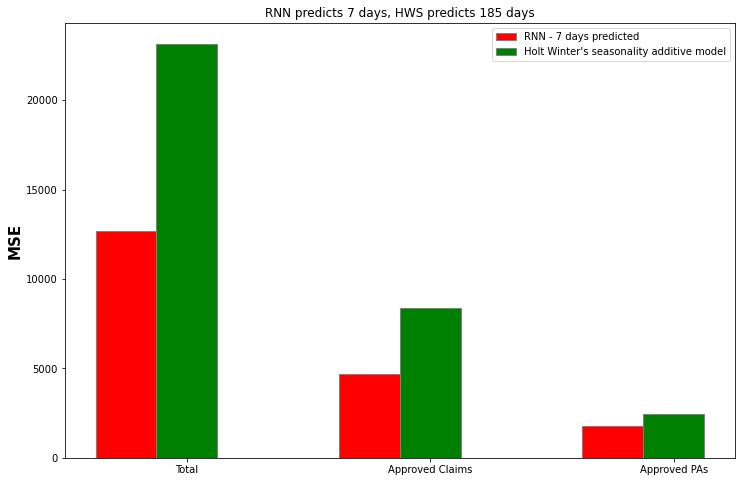

In [98]:

errors = [[12653,4709,1788 ],
[23157, 8357, 2445]]


import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
RNN = [12653,4709,1788]
HWS = [23157, 8357, 2445]

 
# Set position of bar on X axis
br1 = np.arange(len(RNN))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, RNN, color ='r', width = barWidth,
        edgecolor ='grey', label ='RNN - 7 days predicted')
plt.bar(br2, HWS, color ='g', width = barWidth,
        edgecolor ='grey', label ='Holt Winter\'s seasonality additive model')

 
# Adding Xticks
#plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.title('RNN predicts 7 days, HWS predicts 185 days')
plt.ylabel('MSE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(RNN))],
        ['Total', 'Approved Claims', 'Approved PAs'])
 
plt.legend()
plt.show()

In [99]:
X_train.index


Int64Index([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
            ...
            748, 749, 750, 751, 752, 753, 754, 755, 756, 757],
           dtype='int64', length=701)